In [5]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
import hark_portfolio_agents as hpa
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
def run_simulation(agent_parameters, dist_params, n_per_class, a=None, q=None, r=1, fm=None, market=None):
    #initialize population
    pop = hpa.AgentPopulation(agent_parameters, dist_params, n_per_class)
    
    #initialize the financial model
    fm = hpa.FinanceModel() if fm is None else fm
    
    fm.calculate_risky_expectations()
    agent_parameters.update(fm.risky_expectations())
    
    #initialize population model
    pop.init_simulation()
    
    attsim = hpa.AttentionSimulation(pop, fm, a=a, q=q, r=r, market=market)
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [7]:
dist_params = {
    'CRRA' : {'bot' : 2, 'top' : 10, 'n' : 2}, # Chosen for "interesting" results
    'DiscFac' : {'bot' : 0.936, 'top' : 0.978, 'n' : 2} # from CSTW "MPC" results
}

ssvp = sabelhaus_song_var_profile()

In [8]:
#assume all agents are 27
idx_40 = ssvp['Age'].index(40)

#parameters shared by all agents
agent_parameters = {
    'aNrmInitStd' : 0.0,
    'LivPrb' : [0.98 ** 0.25],
    'PermGroFac': [1.01 ** 0.25],
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0,
    'Rfree' : 1.0,
    'TranShkStd' : [ssvp['TranShkStd'][idx_40] / 2],  # Adjust non-multiplicative shock to quarterly
    'PermShkStd' : [ssvp['PermShkStd'][idx_40] ** 0.25]
}

In [9]:
market = hpa.MarketPNL(
   seed_limit = 150
)

config_file: ../PNL/macroliquidity.ini
config_local_file: ../PNL/macroliquidity_local.ini


In [10]:
sim, sim_stats = run_simulation(agent_parameters, dist_params, 1, a=0.2, q=1, r=1, market= market)

--Return--
None
> /Users/nicksawhney/hark/HARK_ABM_INTRO_public/HARK/hark_portfolio_agents.py(136)__init__()
    134         self.dist_params = dist_params
    135         self.agents = self.create_distributed_agents(self.base_parameters, dist_params, n_per_class)
--> 136         breakpoint()
    137 
    138     def agent_df(self):



ipdb>  agents


*** NameError: name 'agents' is not defined


ipdb>  self.agents


[<HARK.ConsumptionSaving.ConsPortfolioModel.PortfolioConsumerType object at 0x1218efcd0.
Parameters:
cycles: 1
CRRA: 4.0
Rfree: 1.0
DiscFac: 0.9465000000000001
LivPrb: [0.9949620563926881]
PermGroFac: [1.0024906793143211]
BoroCnstArt: 0.0
MaxKinks: 400
AgentCount: 4
aNrmInitMean: 0.0
aNrmInitStd: 0.0
pLvlInitMean: 1.0
pLvlInitStd: 0.0
PermGroFacAgg: 1.0
T_age: None
T_cycle: 1
PerfMITShk: False
aXtraMin: 0.001
aXtraMax: 100
aXtraNestFac: 1
aXtraCount: 200
aXtraExtra: [None]
PermShkStd: [0.6191893521335157]
PermShkCount: 7
TranShkStd: [0.1658834945210779]
TranShkCount: 7
UnempPrb: 0.05
UnempPrbRet: 0.005
IncUnemp: 0.3
IncUnempRet: 0.0
tax_rate: 0.0
T_retire: 0
vFuncBool: False
CubicBool: False
neutral_measure: False
RiskyAvg: 1.08
RiskyStd: 0.2
RiskyCount: 5
AdjustPrb: 1.0
ShareCount: 25
DiscreteShareBool: False>, <HARK.ConsumptionSaving.ConsPortfolioModel.PortfolioConsumerType object at 0x1218f4160.
Parameters:
cycles: 1
CRRA: 4.0
Rfree: 1.0
DiscFac: 0.9675
LivPrb: [0.9949620563926881]


Sim ID (SEED): 20
-------------------------- CONFIG ----------------------------
Current working directory: /Users/nicksawhney/hark/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=./out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=./py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=./out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlfilename=LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
nlhomedir=./netlogo-5.3.1-64/
nliqdem=90
nliqsup=90
nlmodeldir=./n

Q-0


NL model: ./nl/LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo


FileNotFoundError: 

In [12]:
import HARK
HARK.__version__

'0.11.0'

In [8]:
data = sim.data()

In [9]:
data

,t,prices,buy,sell,owned,total_assets,ror,expected_ror,expected_std
0,0,101.917634,0,0,898.471311,93390.252000,0.019176,0.001326,0.012260
1,1,103.872042,0,0,898.471311,96292.323062,0.019176,0.001998,0.012446
2,2,105.863928,0,0,898.471311,98512.391212,0.019176,0.002645,0.012562
3,3,105.094533,4,4,898.600135,98668.213937,-0.007268,0.002216,0.012503
4,4,104.330730,0,0,898.600135,99515.451534,-0.007268,0.001805,0.012418
...,...,...,...,...,...,...,...,...,...
475,475,50.719843,0,0,1029.996253,69298.263483,0.001547,-0.013714,0.016668
476,476,50.798303,0,0,1025.208963,69135.890975,0.001547,-0.012587,0.016530
477,477,50.652999,11,7,1032.404515,68949.270779,-0.002860,-0.011868,0.016110
478,478,50.508110,0,0,1032.404515,68799.686884,-0.002860,-0.011203,0.015681


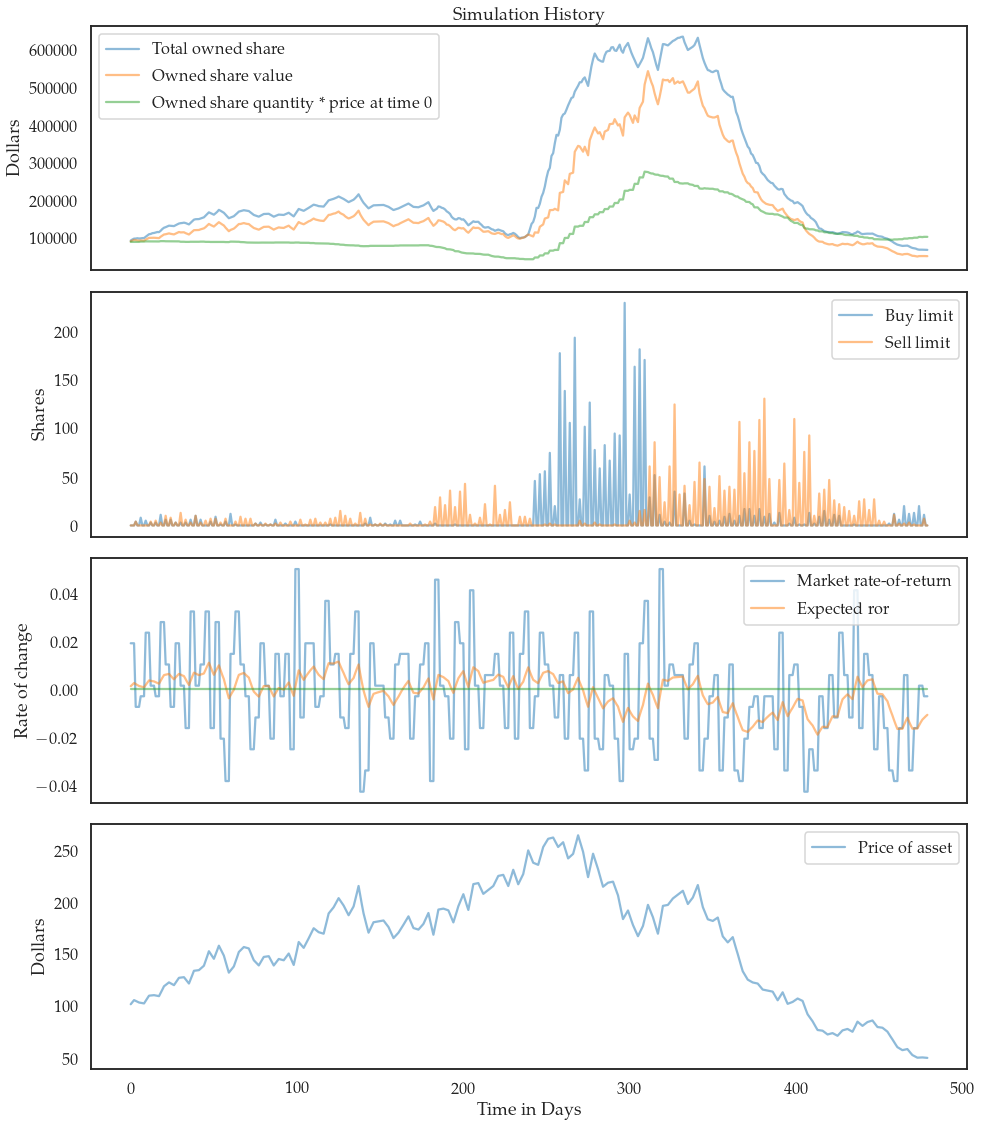

In [23]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(4,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(data['sell'], alpha=0.5, label='Sell limit')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()



In [11]:
sns.lineplot(x=[i for i in range(len(os))], y=os)

NameError: name 'sns' is not defined

In [ ]:
sns.lineplot(x=[i for i in range(len(ta))], y=os)

In [ ]:
sns.lineplot(x=os, y=ta)

In [ ]:
# what are other good plots to include? I don't have the econ background necessary to figure this out yet

In [ ]:
sim.history